In [10]:
import pandas as pd
import numpy as np
import string
import nltk
import pickle
import seaborn as sb
import matplotlib.pyplot as plt

In [12]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Management

In [14]:
df = pd.read_csv('sentiment_140.csv', sep=',', encoding='latin-1', names=["target","ids","date","user","text"])

In [16]:
df.head(3)

,target,ids,date,user,text
0,0,1467810369,Apr 06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Apr 06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Apr 06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...


In [17]:
df.shape

(1600000, 5)

In [18]:
df.dtypes

target     int64
ids        int64
date      object
user      object
text      object
dtype: object

In [19]:
df.describe(exclude="int")

,date,user,text
count,1600000,1600000,1600000
unique,774363,659775,1581463
top,Jun 15 12:53:14,lost_dog,isPlayer Has Died! Sorry
freq,20,549,210


In [20]:
df.groupby('target').describe(exclude=["int"])

date                                  user                       \
         count  unique              top freq   count  unique          top   
target                                                                      
0       800000  593879  Jun 22 12:22:23    9  800000  415671     lost_dog   
4       800000  286578  May 22 05:10:17   17  800000  376569  what_bugs_u   

               text                                          
       freq   count  unique                        top freq  
target                                                       
0       549  800000  790184  isPlayer Has Died! Sorry   210  
4       246  800000  793504              good morning   118

In [21]:
df['length'] = df['text'].apply(len)
df.head(3)

,target,ids,date,user,text,length
0,0,1467810369,Apr 06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Apr 06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Apr 06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89


In [22]:
df[df['target'] == 4].head(3)

,target,ids,date,user,text,length
800000,4,1467822272,Apr 06 22:22:45,ersle,I LOVE @Health4UandPets u guys r the best!!,44
800001,4,1467822273,Apr 06 22:22:45,becca210,im meeting up with one of my besties tonight! ...,72
800002,4,1467822283,Apr 06 22:22:46,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",137


# Statistics

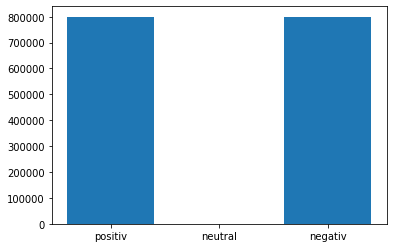

In [23]:
counts = np.array([df[df['target'] == 4].shape[0],df[df['target'] == 2].shape[0], df[df['target'] == 0].shape[0]])
bar_labels = np.array(['positiv', 'neutral', 'negativ'])

plt.bar(bar_labels, counts)

plt.show()

<Figure size 864x360 with 0 Axes>

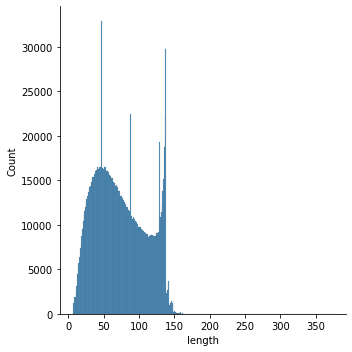

In [24]:
plt.figure(figsize=(12,5))
sb.displot(df[('length')])


# Data CleanUp

In [25]:
def apply_cleanup(text):
    result = "".join([c for c in text if c not in string.punctuation])
    result = [word for word in result.split() if word not in stopwords.words('english')]
    return result

In [26]:
df['text'].head(5).apply(apply_cleanup)

0    [switchfoot, httptwitpiccom2y1zl, Awww, thats,...
1    [upset, cant, update, Facebook, texting, might...
2    [Kenichan, I, dived, many, times, ball, Manage...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, behaving, im, mad, I, cant, ...
Name: text, dtype: object

# Model 

In [27]:
x=df['text']
y=df['target']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=apply_cleanup)),
    ('transformer', TfidfTransformer()),
    ('model', GradientBoostingClassifier(verbose=1))
])

In [30]:
pipeline.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3794           15.42m
         2           1.3737           14.95m
         3           1.3689           14.70m
         4           1.3648           14.52m
         5           1.3610           14.31m
         6           1.3575           14.17m
         7           1.3538           14.05m
         8           1.3509           13.92m
         9           1.3480           13.77m
        10           1.3451           13.61m
        20           1.3209           12.03m
        30           1.3028           10.58m
        40           1.2885            9.06m
        50           1.2766            7.55m
        60           1.2662            6.04m
        70           1.2577            4.53m
        80           1.2496            3.02m
        90           1.2425            1.51m
       100           1.2360            0.00s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function apply_cleanup at 0x000001EC507BF370>)),
                ('transformer', TfidfTransformer()),
                ('model', GradientBoostingClassifier(verbose=1))])

# Evaluation 

In [ ]:
y_predicted = pipeline.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_predicted))

In [ ]:
print(classification_report(y_test, y_predicted))

# Pickle

In [ ]:
pickle.dump(vectorizer, open('vectorizer_tf_idf.pkl', 'wb'))
pickle.dump(model, open('model_random_forest.pkl', 'wb'))